# Récupération de données de _qualité des nappes_ avec Hubeau

In [76]:
import requests
import pandas as pd
from io import StringIO
import json
from matplotlib import pyplot
%matplotlib inline

In [39]:
def recupere_eau_sout_qualite_par_station(station, start_date, end_date, annee=None, departement=None):
    analyses_number_url = 'http://hubeau.eaufrance.fr/api/v1/qualite_nappes/analyses' \
                                                          '?bss_id={s}&date_debut_prelevement={' \
                                                          'debut}&date_fin_prelevement={fin}&size=1'.format(s=station,
                                                                                                            debut=start_date,
                                                                                                            fin=end_date)
    # print(analyses_number_url)
    analyses_number = json.loads(requests.get(analyses_number_url).text)['count']

    if analyses_number > 0:
        analyses_content_url = 'http://hubeau.eaufrance.fr/api/v1/qualite_nappes/analyses.csv?bss_id={' \
                                           's}&date_debut_prelevement={debut}&date_fin_prelevement={fin}&size={nb}'.format(s=station,
                                                                                                          debut=start_date,
                                                                                                          fin=end_date,
                                                                                                          nb=analyses_number + 1)
                    # print(analyses_content_url)
        print("Nombre d'analyses pour la station {s} dans le département {dep} sur l'année {annee} : {nb}".format(s=station, dep=departement, annee=annee, nb=analyses_number))
        return pd.read_csv(StringIO(requests.get(analyses_content_url).text), sep=';', parse_dates=['date_debut_prelevement'], infer_datetime_format=True)
    else:
        print("Pas d'analyses pour la station {s} dans le département {dep} sur l'année {annee}".format(s=station, dep=departement, annee=annee))

In [77]:
#exemple = recupere_eau_sout_qualite_par_station(station='BSS001DYGB', start_date='2017-01-01', end_date='2018-01-01')
#exemple = recupere_eau_sout_qualite_par_station(station='BSS000PZEA', start_date='2016-01-01', end_date='2017-01-01')
exemple = recupere_eau_sout_qualite_par_station(station='BSS000UTKB', start_date='2016-01-01', end_date='2017-01-01')

exemple.info()


Nombre d'analyses pour la station BSS000UTKB dans le département None sur l'année None : 542
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 70 columns):
bss_id                                        542 non-null object
code_bss                                      542 non-null object
urn_bss                                       542 non-null object
longitude                                     542 non-null float64
latitude                                      542 non-null float64
code_insee_actuel                             542 non-null int64
nom_commune_actuel                            542 non-null object
num_departement                               542 non-null int64
nom_departement                               542 non-null object
code_region                                   542 non-null object
nom_region                                    542 non-null object
code_circonscription_administrative_bassin    542 non-null int64
nom_circons

In [78]:
exemple[['date_debut_prelevement']].squeeze().unique()

array(['2016-03-10T00:00:00.000000000'], dtype='datetime64[ns]')

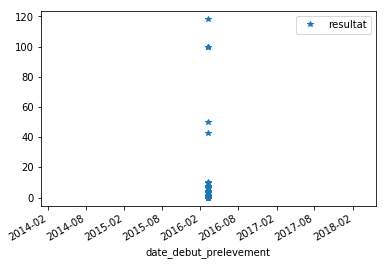

In [79]:
serie = exemple[['date_debut_prelevement', 'resultat']]
serie = serie.set_index('date_debut_prelevement')
serie.plot(style='*')
pyplot.show()

In [54]:
serie.sort_index()

,resultat
date_debut_prelevement,
2017-03-01,0.005
2017-03-01,0.005
2017-03-01,0.005
2017-03-01,0.005
2017-03-01,0.005
2017-03-01,0.005
2017-03-01,0.005
2017-03-01,0.010
2017-03-01,0.005


In [25]:
def recupere_eau_sout_qualite(liste_departements, liste_annees):
    result = pd.DataFrame()
    
    for departement in liste_departements:
        stations_nb_url = 'http://hubeau.eaufrance.fr/api/v1/qualite_nappes/stations?num_departement={}&size=1&exact_count=true&format=json'.format(departement)
        print(stations_nb_url)
        stations_number = json.loads(requests.get(stations_nb_url).text)['count']
        print('Nombre de stations pour le département %s = %i' % (departement, stations_number))
        
        stations = pd.read_csv(StringIO(requests.get('http://hubeau.eaufrance.fr/api/v1/qualite_nappes/stations.csv?num_departement={dep}&size={nb}&fields=bss_id&exact_count=true'.format(dep=departement, nb=stations_number + 1)).text), 
                               sep=';', 
                               squeeze=True)
        for station in stations:
            for annee in liste_annees:
                start_date = '{}-01-01'.format(annee)
                end_date = '{}-01-01'.format(annee+1)
                data_page = recupere_eau_sout_qualite_par_station(station, start_date, end_date, annee, departement)
                result = result.append(data_page, ignore_index=True)
                
    return result

In [56]:
departements = [54]
annees = [2016]
recupere_eau_sout_qualite(departements, annees)

http://hubeau.eaufrance.fr/api/v1/qualite_nappes/stations?num_departement=54&size=1&exact_count=true&format=json
Nombre de stations pour le département 54 = 1027
Pas d'analyses pour la station BSS000GBAA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000GBCA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000PZCA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000SFDA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000SEEA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000UTEA dans le département 54 sur l'année 2016
Nombre d'analyses pour la station BSS000PZEA dans le département 54 sur l'année 2016 : 1740
Pas d'analyses pour la station BSS000MDFA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000KNFA dans le département 54 sur l'année 2016
Pas d'analyses pour la station BSS000UQFA dans le département 54 sur l'année 2016
Pas d'an

KeyboardInterrupt: 

In [ ]:
result = pd.DataFrame()

for station in stations:
    for annee in annees:
        start_date = '{}-01-01'.format(annee)
        end_date = '{}-01-01'.format(annee+1)
        analyses_number_url = 'http://hubeau.eaufrance.fr/api/v1/qualite_nappes/analyses' \
                                                  '?bss_id={s}&date_debut_prelevement={' \
                                                  'debut}&date_fin_prelevement={fin}&size=1'.format(s=station,
                                                                                                    debut=start_date,
                                                                                                    fin=end_date)
        # print(analyses_number_url)
        analyses_number = json.loads(requests.get(analyses_number_url).text)['count']

        if analyses_number > 0:
            analyses_content_url = 'http://hubeau.eaufrance.fr/api/v1/qualite_nappes/analyses.csv?bss_id={' \
                                   's}&date_debut_prelevement={debut}&date_fin_prelevement={fin}&size={nb}'.format(s=station,
                                                                                                  debut=start_date,
                                                                                                  fin=end_date,
                                                                                                  nb=analyses_number + 1)
            # print(analyses_content_url)
            print("Nombre d'analyses pour la station {s} dans le département {dep} sur l'année {annee} : {nb}".format(s=station, dep=departement, annee=annee, nb=analyses_number))
            data_page = pd.read_csv(StringIO(requests.get(analyses_content_url).text), sep=';')
            result = result.append(data_page, ignore_index=True)



In [ ]:
print(result.info())
print(result.head())